In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_netflix = pd.read_csv("netflix daily top 10.csv")

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [6]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [9]:
df_netflix['As of'] = pd.to_datetime(df_netflix['As of'])

In [10]:
df_netflix.describe()

,As of,Rank,Days In Top 10,Viewership Score
count,7100,7100.000000,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,428.000000,1474.000000
std,NaN,2.872484,58.473789,213.861642


- Observamos, portanto, que: 
    - o período da análise foi de 01/04/2020 a 11/03/2022;
    - o tamanho da base de dados é de 7100 registros

In [14]:
# Verificar dados nulos
df_netflix.isna().any()

As of                   False
Rank                    False
Year to Date Rank       False
Last Week Rank          False
Title                   False
Type                    False
Netflix Exclusive        True
Netflix Release Date    False
Days In Top 10          False
Viewership Score        False
dtype: bool

In [22]:
df_netflix[df_netflix['Netflix Exclusive'].isna()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2,2020-04-01,3,3.0,2.0,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4.0,NaN,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
8,2020-04-01,9,8.0,NaN,Badland,Movie,NaN,"Mar 26, 2020",4,11
12,2020-04-02,3,3.0,2.0,All American,TV Show,NaN,"Mar 28, 2019",10,84
15,2020-04-02,6,4.0,NaN,Blood Father,Movie,NaN,"Mar 26, 2020",6,35
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2.0,NaN,The Last Kingdom,TV Show,NaN,"Jul 10, 2016",13,62
7092,2022-03-11,3,3.0,NaN,Good Girls,TV Show,NaN,"Jan 1, 2019",26,149
7097,2022-03-11,8,8.0,NaN,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9.0,7.0,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


- Desta forma, percebemos que 2501 entradas da coluna "Netflix Exclusive" são nulos
- Além disso, percebe-se que as colunas "Year to Date Rank" e "Last Week Rank" foram classificadas como object ao invés de int64. Portanto, espera-se que algum valor não seja numérico (por exemplo, como observado nas primeiras linhas, o valor '-')

In [18]:
# Verificação de não-numéricos
df_netflix['Last Week Rank'] = pd.to_numeric(df_netflix['Last Week Rank'], errors='coerce')
df_netflix['Year to Date Rank'] = pd.to_numeric(df_netflix['Year to Date Rank'], errors='coerce')

In [19]:
# Verificação, novamente, para dados nulos
df_netflix.isna().any()

As of                   False
Rank                    False
Year to Date Rank        True
Last Week Rank           True
Title                   False
Type                    False
Netflix Exclusive        True
Netflix Release Date    False
Days In Top 10          False
Viewership Score        False
dtype: bool

- Agora, percebem-se dados nulos nas colunas "Year to Date Rank" e "Last Week Rank"

In [23]:
# Verificação dos nulos para "Year to Date Rank"
df_netflix[df_netflix['Year to Date Rank'].isna()]

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
13,2020-04-02,4,NaN,NaN,Nailed It!,TV Show,Yes,"Mar 9, 2018",1,7
14,2020-04-02,5,NaN,NaN,How to Fix a Drug Scandal,TV Show,Yes,"Apr 1, 2020",1,6
16,2020-04-02,7,NaN,NaN,The Roommate,Movie,NaN,"Apr 1, 2020",1,4
27,2020-04-03,8,NaN,NaN,The Players Club,Movie,NaN,"Apr 1, 2020",1,3
28,2020-04-03,9,NaN,NaN,Salt,Movie,NaN,"Apr 1, 2020",1,2
...,...,...,...,...,...,...,...,...,...,...
7039,2022-03-05,10,NaN,NaN,Shrek,Movie,NaN,"May 1, 2018",1,1
7049,2022-03-06,10,NaN,NaN,Just Like Heaven,Movie,NaN,"Mar 1, 2022",3,7
7064,2022-03-08,5,NaN,NaN,Good Girls,TV Show,NaN,"Jan 1, 2019",23,124
7079,2022-03-09,10,NaN,NaN,Shooter,Movie,NaN,"Aug 1, 2014",1,1


In [24]:
# Verificação dos nulos para "Last Week Rank"
df_netflix[df_netflix['Last Week Rank'].isna()] 

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
1,2020-04-01,2,2.0,NaN,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
3,2020-04-01,4,4.0,NaN,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
5,2020-04-01,6,6.0,NaN,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10.0,NaN,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
8,2020-04-01,9,8.0,NaN,Badland,Movie,NaN,"Mar 26, 2020",4,11
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2.0,NaN,The Last Kingdom,TV Show,NaN,"Jul 10, 2016",13,62
7091,2022-03-11,2,1.0,NaN,Pieces of Her,TV Show,Yes,"Mar 4, 2022",7,68
7092,2022-03-11,3,3.0,NaN,Good Girls,TV Show,NaN,"Jan 1, 2019",26,149
7097,2022-03-11,8,8.0,NaN,Shooter,Movie,NaN,"Aug 1, 2014",3,7


- Portanto, verificamos que existem:
    - 859 registros sem informação na coluna "Year to Date Rank";
    - 3968 registros sem informação na coluna "Last Week Rank".

### Verificação de Outliers

<Axes: >

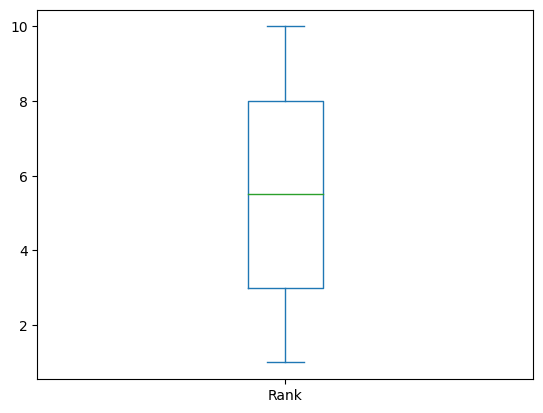

In [25]:
df_netflix['Rank'].plot.box()

<Axes: >

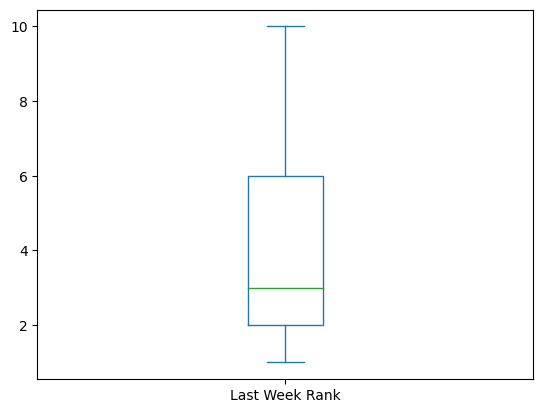

In [27]:
df_netflix['Last Week Rank'].plot.box()

<Axes: >

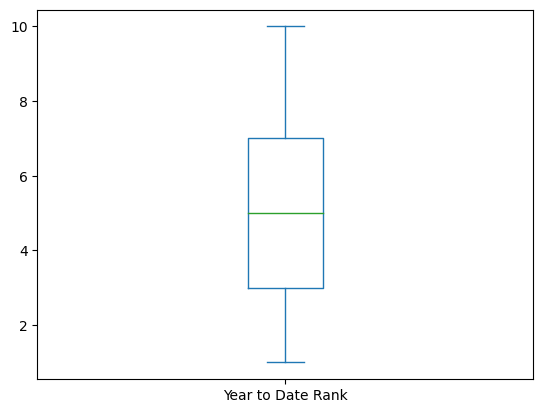

In [28]:
df_netflix['Year to Date Rank'].plot.box()

<Axes: >

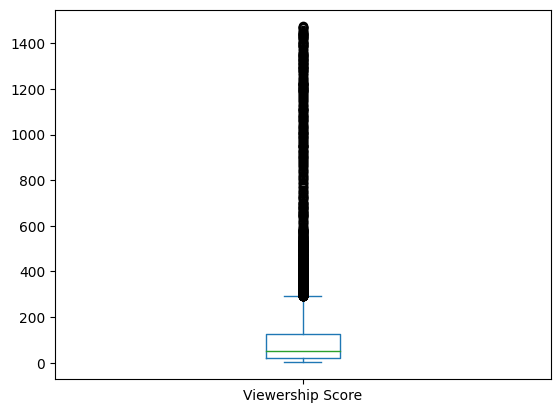

In [29]:
df_netflix['Viewership Score'].plot.box()

<Axes: >

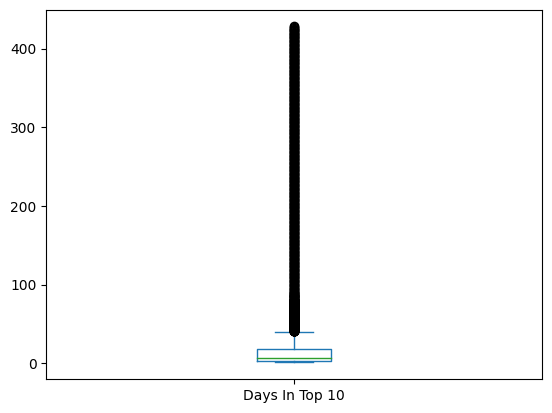

In [30]:
df_netflix['Days In Top 10'].plot.box()

<Axes: ylabel='Frequency'>

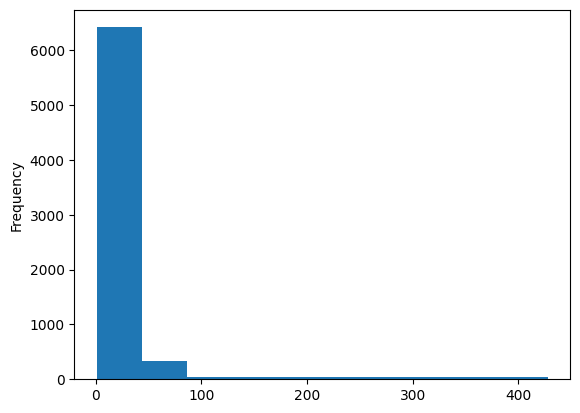

In [31]:
df_netflix['Days In Top 10'].plot.hist()

<Axes: ylabel='Frequency'>

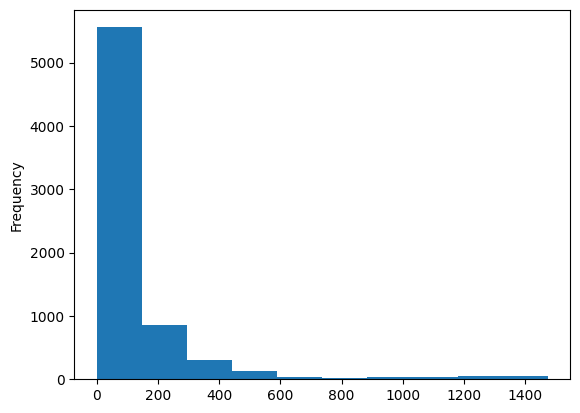

In [33]:
df_netflix['Viewership Score'].plot.hist()

- Percebemos que, para os Ranks, não há outliers;
- Para "Viewership Score" e "Days in Top 10", existem muitos outliers. Isso se dá devido à natureza deste tipo de atributo ter um comportamento mais próximo a uma "Power Law", no qual a maioria das amostras se encontram em pontos próximos a zero (séries com avaliação média e que nunca se entraram no top 10), enquanto que uma parte pequena, mas que não pode ser desconsiderada possui valores muito superiores à mediana (séries de sucesso).